## Ramps-to-slopes:  Detector1Pipeline   (MIRI CALDETECTOR1)

The `Detector1Pipeline` takes DMS Level 1B data and applies basic detector-level corrections to all exposure types. It is applied to one exposure at a time. It is sometimes referred to as “ramps-to-slopes” processing, because the input raw data are in the form of one or more ramps (integrations) containing accumulating counts from the non-destructive detector readouts and the output is a corrected countrate (slope) image.

Official documentation for `Detector1Pipeline` can be found here:

<https://jwst-pipeline.readthedocs.io/en/latest/jwst/pipeline/calwebb_detector1.html>

The `Detector1Pipeline` comprises a linear series of steps to first calibrate the pixel ramps, detect cosmic ray jumps, and fit a linear function to the calibrate ramps to produce a slope or DMS Level 2A image. The steps applied to MIRI data in order are:

|Step|Description|
|:---|:---|
|`dq_init`|populates the DQ mask for the input dataset|
|`saturation`|flags saturated pixel values|
|`firstframe`|flags the first group in every integration as bad|
|`lastframe`|flags the last group in every integration as bad|
|`linearity`|corrects for detector non-linearity|
|`rscd`|correct for the reset switch charge decay|
|`dark_current`|subtracts dark current data|
|`refpix`|corrects for pixel drifts using the reference pixels|
|`jump`|detects jumps in the ramps by looking for outliers in each integration|
|`ramp_fit`|determines count rate for each pixel by performing a linear fit to ramps|

For more information and examples of each of the steps click on the links in the side bar.

### Input data

An example of running the file through the Detector1Pipeline is now shown using a simple simulated observation of a galaxy and some point sources with the MIRI Imager (F1130W filter) produced with [MIRISim v2.3](https://wiki.miricle.org/Public/MIRISim_Public).

### Python

Start by importing what will be used and set the `CRDS_CONTEXT`

In [1]:
# imports
import os, glob, shutil
import numpy as np
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
from subprocess import call
from jwst import datamodels

# set the CRDS_CONTEXT
os.environ["CRDS_CONTEXT"] = "jwst_0641.pmap"

Import Detector1Pipeline and print the docstring to show some information

In [2]:
from jwst.pipeline import Detector1Pipeline
print(Detector1Pipeline.__doc__)


    Detector1Pipeline: Apply all calibration steps to raw JWST
    ramps to produce a 2-D slope product. Included steps are:
    group_scale, dq_init, saturation, ipc, superbias, refpix, rscd,
    lastframe, linearity, dark_current, persistence, jump detection,
    ramp_fit, and gain_scale.
    


Set the name of the input file, where the output should be saved and run the pipeline. The output level 2A files will be saved in `my_output_dir` as `_rate.fits`. Note that we must explicitly skip the IPC step when running from Python. This is achieved by passing the `skip` parameter to the step in a Python `dict`.

*Parameters used:*

`output_use_model` : boolean, optional, default=False  
&nbsp;&nbsp;&nbsp;&nbsp; propagate the input filename to the output
    
`save_results`: boolean, optional, default=False  
&nbsp;&nbsp;&nbsp;&nbsp; save the results to file
    
`output_dir` : boolean, optional, default is the working directory   
&nbsp;&nbsp;&nbsp;&nbsp; the location to save the output
    
`steps` : dict, optional  
&nbsp;&nbsp;&nbsp;&nbsp; dict of user-defined parameters for individual steps  

Note that the `Detector1Pipeline` will return the rate datamodel so we set this to the `dm` variable.


In [3]:
# user specified
my_input_file = 'IMA_simulation/det_image_seq1_MIRIMAGE_F1130Wexp1.fits'
my_output_dir = 'IMA_demo_output'

# the output directory should be created if it doesn't exist
if not os.path.exists(my_output_dir): 
    os.mkdir(my_output_dir)

# run the pipeline
dm = Detector1Pipeline.call(my_input_file, output_use_model=True, save_results=True, 
                            output_dir=my_output_dir, steps={'ipc': {'skip': True},
                                                             'refpix': {'skip': True}})


2020-10-14 11:22:46,652 - CRDS - ERROR -  Error determining best reference for 'pars-groupscalestep'  =   Unknown reference type 'pars-groupscalestep'
2020-10-14 11:22:46,658 - CRDS - ERROR -  Error determining best reference for 'pars-dqinitstep'  =   Unknown reference type 'pars-dqinitstep'
2020-10-14 11:22:46,663 - CRDS - ERROR -  Error determining best reference for 'pars-saturationstep'  =   Unknown reference type 'pars-saturationstep'
2020-10-14 11:22:46,668 - CRDS - ERROR -  Error determining best reference for 'pars-ipcstep'  =   Unknown reference type 'pars-ipcstep'
2020-10-14 11:22:46,673 - CRDS - ERROR -  Error determining best reference for 'pars-superbiasstep'  =   Unknown reference type 'pars-superbiasstep'
2020-10-14 11:22:46,677 - CRDS - ERROR -  Error determining best reference for 'pars-refpixstep'  =   Unknown reference type 'pars-refpixstep'
2020-10-14 11:22:46,682 - CRDS - ERROR -  Error determining best reference for 'pars-rscd_step'  =   Unknown reference type 'p

2020-10-14 11:22:47,097 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'det_image_seq1_MIRIMAGE_F1130Wexp1.fits' reftypes = ['dark', 'gain', 'linearity', 'mask', 'persat', 'readnoise', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2020-10-14 11:22:47,103 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/Users/patrickkavanagh/crds_mirror/references/jwst/miri/jwst_miri_dark_0049.fits'.
2020-10-14 11:22:47,103 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/Users/patrickkavanagh/crds_mirror/references/jwst/miri/jwst_miri_gain_0008.fits'.
2020-10-14 11:22:47,104 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/Users/patrickkavanagh/crds_mirror/references/jwst/miri/jwst_miri_linearity_0024.fits'.
2020-10-14 11:22:47,105 - stpipe.Detector1Pipeline - INFO - Prefetch for MASK reference file is '/Users/patrickkavanagh/crds_mirror/references/jwst/miri/jwst_miri_mask_0023.

2020-10-14 11:22:50,377 - stpipe.Detector1Pipeline.dark_current - INFO - Step dark_current parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': 'IMA_demo_output', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': 'IMA_simulation', 'dark_output': None}
2020-10-14 11:22:50,388 - stpipe.Detector1Pipeline.dark_current - INFO - Using DARK reference file /Users/patrickkavanagh/crds_mirror/references/jwst/miri/jwst_miri_dark_0049.fits
2020-10-14 11:22:51,858 - stpipe.Detector1Pipeline.dark_current - INFO - Science data nints=2, ngroups=20, nframes=1, groupgap=0
2020-10-14 11:22:51,859 - stpipe.Detector1Pipeline.dark_current - INFO - Dark data nints=2, ngroups=45, nframes=1, groupgap=0
2020-10-14 11:22:52,228 - stpipe.Detector1Pipeline.dark_current - INFO - Step dark_current done
2020-10-14 11:22:52,370 - stpipe.Detector1Pipeline.refpix - IN

We can plot the before (last frame of first integration) and after images

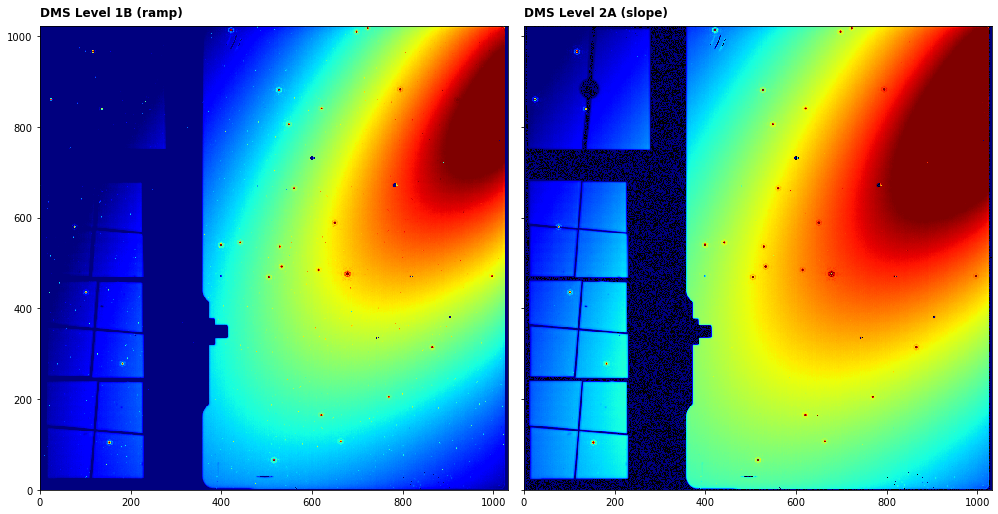

In [10]:
# open the input image as a jwst data model
with datamodels.open(my_input_file) as in_dm:

    fig, axs = plt.subplots(1, 2, figsize=(14, 7), sharey=True)

    axs[0].imshow(in_dm.data[0,-1,:,:], cmap='jet', interpolation='nearest', origin='lower', norm=LogNorm(vmin=1e4,vmax=6e4))
    axs[0].annotate('DMS Level 1B (ramp)', xy=(0.0, 1.02), xycoords='axes fraction', fontsize=12, fontweight='bold', color='k')
    axs[0].set_facecolor('black')
    axs[1].imshow(dm.data, cmap='jet', interpolation='nearest', origin='lower', norm=LogNorm(vmin=10, vmax=100))
    axs[1].annotate('DMS Level 2A (slope)', xy=(0.0, 1.02), xycoords='axes fraction', fontsize=12, fontweight='bold', color='k')
    axs[1].set_facecolor('black')
    plt.tight_layout()
    plt.show()


### Command line

To achieve the same result from the command line there are a couple of options. 

**Option 1:**
Run the `Detector1Pipeline` class using the `strun` command:

```bash
mkdir demo_output

strun jwst.pipeline.Detector1Pipeline det_image_seq1_MIRIMAGE_F1130Wexp1.fits --output_dir demo_output
```

This will produce the same output file in the user-defined `--output_dir`


**Option 2:**
Collect the pipeline configuration files in your working directory using `collect_pipeline_configs` and then run the `Detector1Pipeline` using the `strun` command with the associated `calwebb_detector1.cfg` file. This option is a little more flexible as one can create edit the cfg files, use them again, etc.

```bash
mkdir demo_output

collect_pipeline_cfgs cfgs/

strun cfgs/calwebb_detector1.cfg det_image_seq1_MIRIMAGE_F1130Wexp1.fits --output_dir demo_output
```

This will produce the same output file in the user-defined `--output_dir`


### Further examples

Other notebooks with more complex examples can be found here:

*To be added*